In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from sklearn.linear_model import LogisticRegression

In [2]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=20,
)

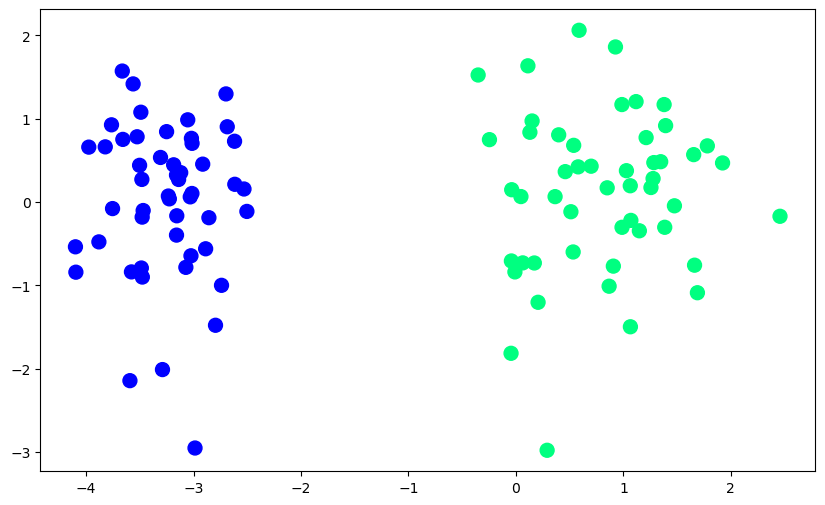

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)

In [6]:
lor = LogisticRegression(penalty=None, solver="sag")
lor.fit(X, y)

/home/swapnil/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [7]:
print(lor.coef_)
print(lor.intercept_)

[[4.78466937 0.20959535]]
[5.75291638]


In [8]:
m1 = -(lor.coef_[0][0] / lor.coef_[0][1])
b1 = -(lor.intercept_ / lor.coef_[0][1])

In [9]:
x_input = np.linspace(-3, 3, 100)
y_input = m1 * x_input + b1

In [10]:
def gd(X, y):

    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(5000):
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights + lr * (np.dot((y - y_hat), X) / X.shape[0])

    return weights[1:], weights[0]

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [12]:
coef_, intercept_ = gd(X, y)

In [13]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

In [14]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m * x_input1 + b

(-3.0, 2.0)

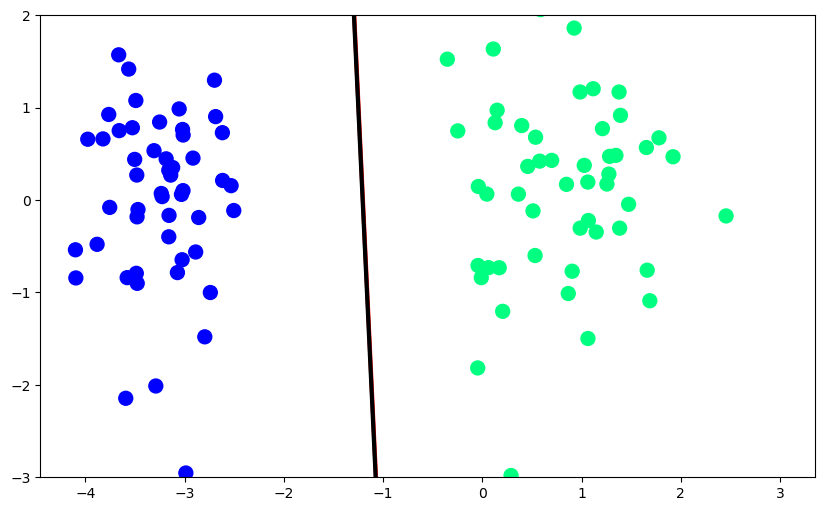

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.plot(x_input1, y_input1, color="black", linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.ylim(-3, 2)